<p align="center" width="100%">
    <img width="66%" src="https://raw.githubusercontent.com/linukc/master_dlcourse/main/images/logo.png">
</p>

 # **[MIPT DL frameworks Autumn 2025](https://wiki.cogmodel.mipt.ru/s/mtai/doc/2025-nejrosetevye-frejmvorki-glubokogo-obucheniya-y8VYap3O9E). Class 1: SuperResolution**

# Задание

Реализовать модель повышения ращрешения [ConvFromer SuperResolution](https://arxiv.org/pdf/2401.05633).
Оценка - 2 балла максимум.

Данные:

In [ ]:
!pip install super-image datasets==2.15

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successful

## Реализуем CFSR

### Базовые блоки

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F


class LayerNorm(nn.Module):
    r""" From ConvNeXt (https://arxiv.org/pdf/2201.03545.pdf)
    """

    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape))
        self.bias = nn.Parameter(torch.zeros(normalized_shape))
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise NotImplementedError
        self.normalized_shape = (normalized_shape, )

    def forward(self, x):
        if self.data_format == "channels_last":
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            u = x.mean(1, keepdim=True)
            s = (x - u).pow(2).mean(1, keepdim=True)
            x = (x - u) / torch.sqrt(s + self.eps)
            x = self.weight[:, None, None] * x + self.bias[:, None, None]
            return x



### Large kernel mixer

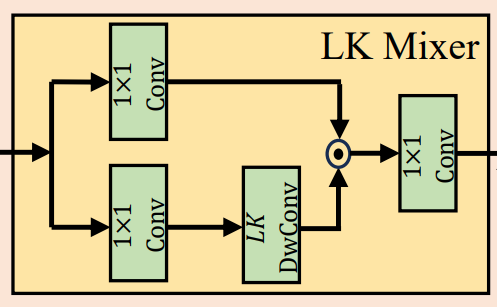

In [ ]:
# B x ... x D_

# B x C x H x W

class LargeKernelMixer(nn.Module):
    ...


### Sobel kernel

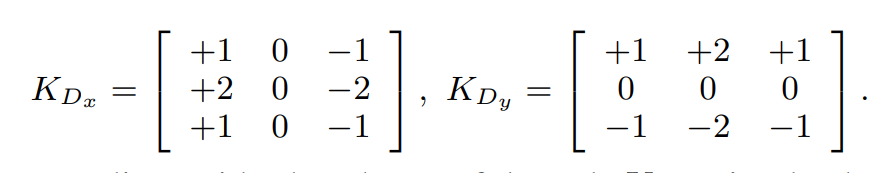

In [ ]:
def generate_sobel_conv_kernels(dim):
    ...
    return Ksx, Ksy

### Laplacian Kernel


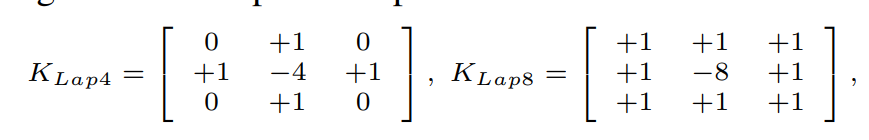

In [ ]:
def generate_laplacian_conv_kernels(dim):
    ...
    return Kl4, Kl8

### Edge-preserving Depth-Wise Convolution

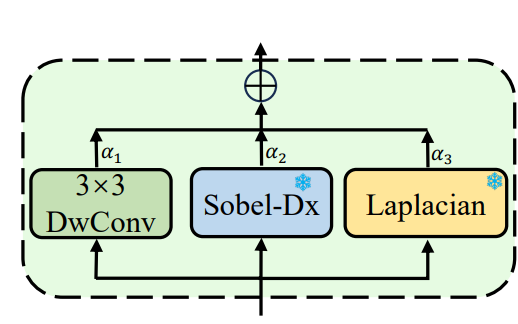

In [ ]:
class EDC(nn.Module):
    ...

### Edge-preserving Feed-forward Network


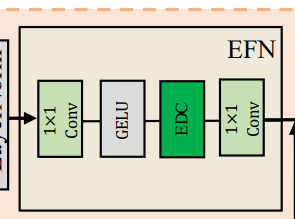

In [ ]:
class EFN(nn.Module)
    ...

### ConvFormer Layer

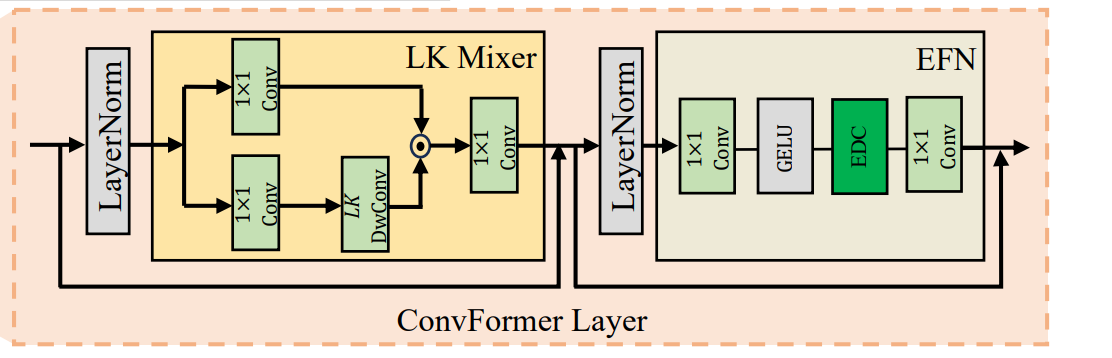

In [ ]:
class ConvFormerLayer(nn.Module):
    ...

### CFSR Blocks

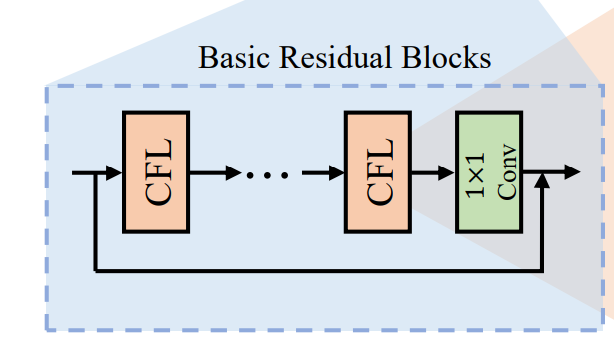

In [ ]:
class UpsampleOneStep(nn.Sequential):
    """UpsampleOneStep module (the difference with Upsample is that it always only has 1conv + 1pixelshuffle)
       Used in lightweight SR to save parameters.

    Args:
        scale (int): Scale factor. Supported scales: 2^n and 3.
        num_feat (int): Channel number of intermediate features.

    """

    def __init__(self, scale: int, num_feat: int, num_out_ch: int = 3):
        self.num_feat = num_feat
        self.input_resolution = input_resolution
        m = []
        m.append(nn.Conv2d(num_feat, (scale**2) * num_out_ch, 3, 1, 1))
        m.append(nn.PixelShuffle(scale))
        super(UpsampleOneStep, self).__init__(*m)



class CFSRBlock(nn.Module):
    ...

### ConvFormer SuperResolution

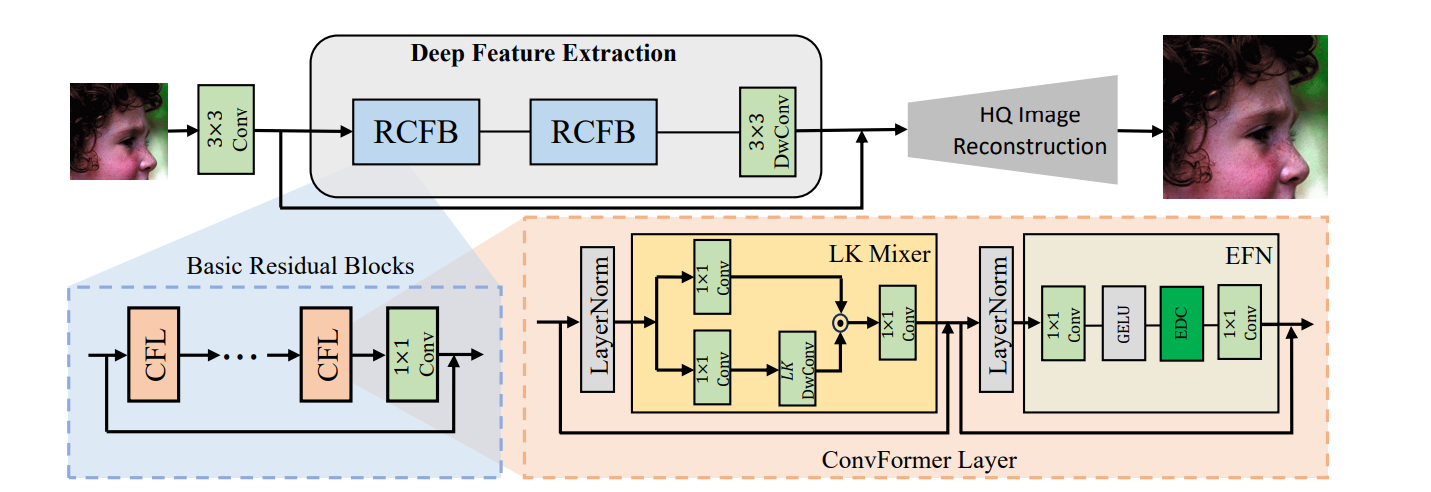

In [ ]:
class CFSRModel(nn.Module):
    ...

### Обучаем модель

In [ ]:
from datasets import load_dataset
from super_image.data import EvalDataset, TrainDataset, augment_five_crop

augmented_dataset = load_dataset('eugenesiow/Div2k', 'bicubic_x4', split='train')\
    .map(augment_five_crop, batched=True, desc="Augmenting Dataset")                                # download and augment the data with the five_crop method
train_dataset = TrainDataset(augmented_dataset)                                                     # prepare the train dataset for loading PyTorch DataLoader
eval_dataset = EvalDataset(load_dataset('eugenesiow/Div2k', 'bicubic_x4', split='validation'))      # prepare the eval dataset for the PyTorch DataLoader

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Augmenting Dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

In [ ]:
from super_image import Trainer, TrainingArguments, EdsrModel, EdsrConfig

training_args = TrainingArguments(
    output_dir='./results',                 # output directory
    num_train_epochs=100,                  # total number of training epochs
)
model = CFSRModel(...)

trainer = Trainer(
    model=model,                         # the instantiated model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=eval_dataset            # evaluation dataset
)

trainer.train()